# Regression Programming Project
Team Members:
- Dao Chi Tuong - V202100399
- Nguyen Xuan Thai Duong - V202100519
- Do Doan Khac - V202100513


## Table of Content
1. Data Preprocessing
2. Regression and Diagnostics
3. P-value Interpretation
4. Step-wise forward regression
5. Step-wise backward regression
6. Difference between forward and backward regression

##1. Data preparation


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
df = pd.read_csv('miami-housing.csv')
print(df.head()) 

    LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0  25.891031 -80.160561  622280070620  440000.0        9375          1753   
1  25.891324 -80.153968  622280100460  349000.0        9375          1715   
2  25.891334 -80.153740  622280100470  800000.0        9375          2276   
3  25.891765 -80.152657  622280100530  988000.0       12450          2058   
4  25.891825 -80.154639  622280100200  755000.0       12800          1684   

   SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
0              0     2815.9     12811.4       347.6    42815.3     37742.2   
1              0     4359.1     10648.4       337.8    43504.9     37340.5   
2          49206     4412.9     10574.1       297.1    43530.4     37328.7   
3          10033     4585.0     10156.5         0.0    43797.5     37423.2   
4          16681     4063.4     10836.8       326.6    43599.7     37550.8   

   HWY_DIST  age  avno60plus  month_sold  structure_quality  
0   15

array([[<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'PARCELNO'}>,
        <Axes: title={'center': 'SALE_PRC'}>],
       [<Axes: title={'center': 'LND_SQFOOT'}>,
        <Axes: title={'center': 'TOT_LVG_AREA'}>,
        <Axes: title={'center': 'SPEC_FEAT_VAL'}>,
        <Axes: title={'center': 'RAIL_DIST'}>],
       [<Axes: title={'center': 'OCEAN_DIST'}>,
        <Axes: title={'center': 'WATER_DIST'}>,
        <Axes: title={'center': 'CNTR_DIST'}>,
        <Axes: title={'center': 'SUBCNTR_DI'}>],
       [<Axes: title={'center': 'HWY_DIST'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avno60plus'}>,
        <Axes: title={'center': 'month_sold'}>],
       [<Axes: title={'center': 'structure_quality'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

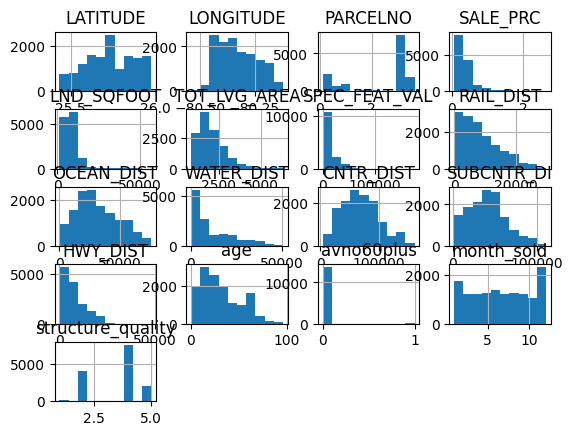

In [6]:
df.hist()

In [7]:
for col_name, col_data in df.items():
    num_null = col_data.isnull().sum()
    print(f"{col_name}: {num_null}/{len(df)}")

LATITUDE: 0/13932
LONGITUDE: 0/13932
PARCELNO: 0/13932
SALE_PRC: 0/13932
LND_SQFOOT: 0/13932
TOT_LVG_AREA: 0/13932
SPEC_FEAT_VAL: 0/13932
RAIL_DIST: 0/13932
OCEAN_DIST: 0/13932
WATER_DIST: 0/13932
CNTR_DIST: 0/13932
SUBCNTR_DI: 0/13932
HWY_DIST: 0/13932
age: 0/13932
avno60plus: 0/13932
month_sold: 0/13932
structure_quality: 0/13932


Observe that there is no null data in our dataset, thus we may not perform data filling.


### 1.1. Feature Selection
We observe the correlations between the features, as well as between them and the sale prices for the houses.


In [8]:
x = df.corr()
x.style.background_gradient(cmap='coolwarm').set_precision(4)

<ipython-input-8-4de119189461>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  x.style.background_gradient(cmap='coolwarm').set_precision(4)


,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
LATITUDE,1.0000,0.7212,-0.1655,0.0477,-0.0775,-0.1940,-0.0076,-0.1724,0.2427,-0.4234,-0.7173,-0.1958,-0.1134,0.4170,0.0814,-0.0236,0.3920
LONGITUDE,0.7212,1.0000,-0.4328,0.1953,0.0182,-0.1810,-0.0094,-0.3032,-0.4575,-0.7643,-0.7920,-0.3802,-0.2164,0.4888,0.0594,-0.0109,0.1329
PARCELNO,-0.1655,-0.4328,1.0000,-0.2041,0.0714,0.1024,0.0552,0.2234,0.2892,0.2960,0.4199,0.2439,0.0182,-0.2707,-0.1609,0.0111,0.0447
SALE_PRC,0.0477,0.1953,-0.2041,1.0000,0.3631,0.6673,0.4975,-0.0770,-0.2747,-0.1279,-0.2714,-0.3701,0.2319,-0.1234,-0.0270,0.0003,0.3840
LND_SQFOOT,-0.0775,0.0182,0.0714,0.3631,1.0000,0.4375,0.3907,-0.0839,-0.1616,-0.0551,-0.0232,-0.1591,0.1305,0.1012,-0.0059,0.0059,-0.0067
TOT_LVG_AREA,-0.1940,-0.1810,0.1024,0.6673,0.4375,1.0000,0.5061,0.0755,-0.0501,0.1483,0.1365,-0.0449,0.2295,-0.3406,-0.0565,0.0025,0.1734
SPEC_FEAT_VAL,-0.0076,-0.0094,0.0552,0.4975,0.3907,0.5061,1.0000,-0.0220,-0.0552,0.0139,-0.0488,-0.1519,0.1538,-0.0988,-0.0089,-0.0140,0.1880
RAIL_DIST,-0.1724,-0.3032,0.2234,-0.0770,-0.0839,0.0755,-0.0220,1.0000,0.2590,0.1623,0.4445,0.4855,-0.0925,-0.2345,-0.1170,0.0106,-0.0741
OCEAN_DIST,0.2427,-0.4575,0.2892,-0.2747,-0.1616,-0.0501,-0.0552,0.2590,1.0000,0.4908,0.2454,0.4259,0.0935,-0.1594,0.0352,-0.0127,0.2095
WATER_DIST,-0.4234,-0.7643,0.2960,-0.1279,-0.0551,0.1483,0.0139,0.1623,0.4908,1.0000,0.5270,0.1953,0.4002,-0.3306,-0.0963,0.0106,-0.0343


Based on the analysis, it is observed that the variables "month_sold," "avno60plus," and "LATITUDE" have a very weak correlation (less than 0.05) with the sale price. Therefore, it is suggested to remove these features from the dataset as they are not significantly related to the property's selling price.

Another observation is that "LONGITUDE" exhibits a strong correlation with both "WATER_DIST" and "CNTR_DIST," which is expected due to the geographical characteristics of the city. However, the correlation between "WATER_DIST" and "CNTR_DIST" is not as high (0.527), indicating that the relationship between them is not straightforward. Hence, it is recommended to only eliminate the "LONGITUDE" variable while retaining "WATER_DIST" and "CNTR_DIST."

<br>![image](https://www.google.com/maps/d/thumbnail?mid=1_plDUKgeSM4AMcbT30uMAtshUkw&hl=en)

Additionally, considering the definition of "PARCELNO" as a unique identifier for each property, it can be inferred that such features can be removed from the dataset as they essentially serve as identification numbers for the properties.

In [9]:
#remove lat, long and parcelno
df.drop(["LATITUDE", "LONGITUDE", "PARCELNO", "month_sold", "avno60plus"], axis=1, inplace=True)


In [10]:
print(df)

       SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  SPEC_FEAT_VAL  RAIL_DIST  \
0      440000.0        9375          1753              0     2815.9   
1      349000.0        9375          1715              0     4359.1   
2      800000.0        9375          2276          49206     4412.9   
3      988000.0       12450          2058          10033     4585.0   
4      755000.0       12800          1684          16681     4063.4   
...         ...         ...           ...            ...        ...   
13927  275000.0        6780           967           6580     3844.5   
13928  340000.0        7500          1854           2544     3593.6   
13929  287500.0        8460          1271           2064     4143.2   
13930  315000.0        7500          1613           3136     3986.9   
13931  250000.0        8833          1867            266     3793.9   

       OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  HWY_DIST  age  \
0         12811.4       347.6    42815.3     37742.2   15954.9   67   
1    

In [11]:
df_matrix = df.to_numpy()
prices = df_matrix[:, 0]
params = df_matrix[:, 1:]

Due to uncertainty regarding whether a higher value in the structure quality variable indicates higher quality, it is suggested to represent structure quality as one-hot encoded values rather than using it as a continuous variable.

In [12]:
#changing structure quality and month sold into one hot.
structure_quality = params[:, -1].astype(int)
n_values = np.max(structure_quality) + 1
structure_quality_one_hot = np.eye(int(n_values)-1)[np.array(structure_quality)-1]
structure_quality = pd.DataFrame(structure_quality_one_hot, columns = ["structure_quality_1",  "structure_quality_2", "structure_quality_3", "structure_quality_4", "structure_quality_5"])

In [13]:
# from google.colab import files
del df["structure_quality"]
new_df = df.join(structure_quality)
new_df.to_csv('newdata.csv', index=False, na_rep='Unknown')
# files.download('newdata.csv')

In [14]:
columns = new_df.columns
new_df

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,structure_quality_1,structure_quality_2,structure_quality_3,structure_quality_4,structure_quality_5
0,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0.0,0.0,0.0,1.0,0.0
1,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0.0,0.0,0.0,1.0,0.0
2,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0.0,0.0,0.0,1.0,0.0
3,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0.0,0.0,0.0,1.0,0.0
4,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0.0,0.0,0.0,1.0,0.0
13928,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0.0,0.0,0.0,1.0,0.0
13929,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0.0,0.0,0.0,1.0,0.0
13930,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0.0,0.0,0.0,1.0,0.0


###1.2 Feature regularization
From the histogram, we observe that there are features that do not follow the normal distribution.
We use standard scaler for features that do not follow the normal distribution.

In [15]:
from sklearn.preprocessing import StandardScaler
new_df[columns[1:]]= StandardScaler().fit_transform(new_df[columns[1:]])
new_df[:5]

,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,structure_quality_1,structure_quality_2,structure_quality_3,structure_quality_4,structure_quality_5
0,440000.0,0.124240,-0.374974,-0.688421,-0.895569,-1.073043,-0.973193,-0.802161,-0.152197,1.356321,1.717578,-0.114085,-0.646876,-0.033908,0.909477,-0.409649
1,349000.0,0.124240,-0.421685,-0.688421,-0.645771,-1.195979,-0.974014,-0.780616,-0.170324,1.713909,1.528474,-0.114085,-0.646876,-0.033908,0.909477,-0.409649
2,800000.0,0.124240,0.267920,2.854008,-0.637063,-1.200202,-0.977425,-0.779819,-0.170856,1.726350,1.433921,-0.114085,-0.646876,-0.033908,0.909477,-0.409649
3,988000.0,0.630840,-0.000055,0.033873,-0.609205,-1.223937,-1.002323,-0.771474,-0.166592,1.778074,1.528474,-0.114085,-0.646876,-0.033908,0.909477,-0.409649
4,755000.0,0.688502,-0.459791,0.512474,-0.693636,-1.185271,-0.974953,-0.777654,-0.160834,1.677394,0.535674,-0.114085,-0.646876,-0.033908,0.909477,-0.409649


In [16]:
params = sm.add_constant(new_df[columns[1:]])
const = pd.Index(["const"])
cols = const.append(columns[1:])
params = pd.DataFrame(params, columns=cols)
params[:5]

,const,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,structure_quality_1,structure_quality_2,structure_quality_3,structure_quality_4,structure_quality_5
0,1.0,0.124240,-0.374974,-0.688421,-0.895569,-1.073043,-0.973193,-0.802161,-0.152197,1.356321,1.717578,-0.114085,-0.646876,-0.033908,0.909477,-0.409649
1,1.0,0.124240,-0.421685,-0.688421,-0.645771,-1.195979,-0.974014,-0.780616,-0.170324,1.713909,1.528474,-0.114085,-0.646876,-0.033908,0.909477,-0.409649
2,1.0,0.124240,0.267920,2.854008,-0.637063,-1.200202,-0.977425,-0.779819,-0.170856,1.726350,1.433921,-0.114085,-0.646876,-0.033908,0.909477,-0.409649
3,1.0,0.630840,-0.000055,0.033873,-0.609205,-1.223937,-1.002323,-0.771474,-0.166592,1.778074,1.528474,-0.114085,-0.646876,-0.033908,0.909477,-0.409649
4,1.0,0.688502,-0.459791,0.512474,-0.693636,-1.185271,-0.974953,-0.777654,-0.160834,1.677394,0.535674,-0.114085,-0.646876,-0.033908,0.909477,-0.409649


array([[<Axes: title={'center': 'const'}>,
        <Axes: title={'center': 'LND_SQFOOT'}>,
        <Axes: title={'center': 'TOT_LVG_AREA'}>,
        <Axes: title={'center': 'SPEC_FEAT_VAL'}>],
       [<Axes: title={'center': 'RAIL_DIST'}>,
        <Axes: title={'center': 'OCEAN_DIST'}>,
        <Axes: title={'center': 'WATER_DIST'}>,
        <Axes: title={'center': 'CNTR_DIST'}>],
       [<Axes: title={'center': 'SUBCNTR_DI'}>,
        <Axes: title={'center': 'HWY_DIST'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'structure_quality_1'}>],
       [<Axes: title={'center': 'structure_quality_2'}>,
        <Axes: title={'center': 'structure_quality_3'}>,
        <Axes: title={'center': 'structure_quality_4'}>,
        <Axes: title={'center': 'structure_quality_5'}>]], dtype=object)

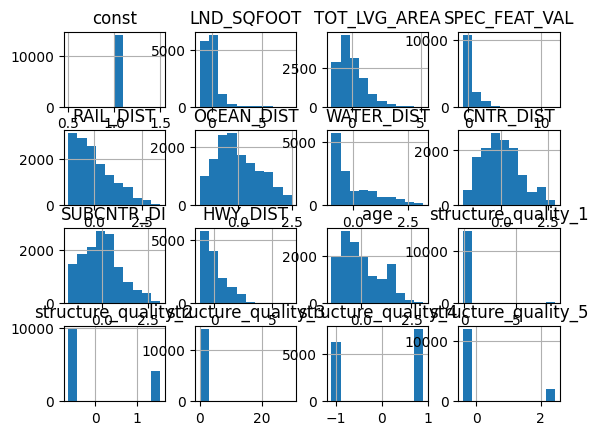

In [17]:
params.hist()

# 2. Regression and Diagnostics
We use OLS statsmodels for this task.

In [ ]:
#regressions
prices = new_df['SALE_PRC']

import statsmodels.api as sm
model = sm.OLS(prices, params)
model = model.fit()
np.array(model.params)
 

array([399941.93173988,  23228.07138507, 145901.35120967,  38441.25339012,
        29934.62034663, -75636.32822979,  15030.53696039, -89758.60621996,
       -13026.34267958,  29134.19733425, -34784.03517022, -16890.16281977,
       -37336.04166611,  30090.61865536, -13995.9083787 ,  70916.97692732])

In [ ]:
#diagnostics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               SALE_PRC   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2622.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:20:27   Log-Likelihood:            -1.8725e+05
No. Observations:               13932   AIC:                         3.745e+05
Df Residuals:                   13917   BIC:                         3.747e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.999e+05   1

In [ ]:
print(f'RMSE:\t{model.mse_total**0.5:.4f}')

RMSE:	317214.6838


Observe that our RMSE is relatively high, implying that our regression is not necessarily good.

# 3. P-value Interpretation

In [ ]:
model.pvalues

const                   0.000000e+00
LND_SQFOOT              4.201582e-40
TOT_LVG_AREA            0.000000e+00
SPEC_FEAT_VAL          6.347157e-111
RAIL_DIST               6.591870e-72
OCEAN_DIST             7.374608e-226
WATER_DIST              2.954519e-08
CNTR_DIST              4.624589e-122
SUBCNTR_DI              9.633978e-05
HWY_DIST                1.801418e-68
age                     2.903031e-74
structure_quality_1     1.799569e-32
structure_quality_2    1.006342e-226
structure_quality_3     1.169015e-98
structure_quality_4     1.182082e-54
structure_quality_5     0.000000e+00
dtype: float64

The analysis reveals that the selected features have unexpectedly low p-values, suggesting their strong relevance in predicting house prices. Notably, TOT_LVG_AREA and structure_quality_5 exhibit a p-value of 0, which is unusual but implies their potential significance in the prediction. However, this could simply be due to the fact that the sample size is too big, because as the sample get bigger, the p-value of columns go to zero. The relatively small p-values associated with the one-hot encoded structure quality values indicate that structure quality may play a crucial role in determining the price, followed by the distance to the ocean and city center.

# 4. Step-wise forward regression

With the p-values being too low, we can not effectively find a threshold for the p-values of the features. Thus, we may perform step-wise regression to choose 5 best features.

In [18]:
#forward
labels = [i for i in params][1:]
chosen_labels = []
for i in range(5): #choosing best 5
  best_label = ""
  best_pvalue = float("inf")
  for label in labels:
    f_params = params[chosen_labels + [label]]
    X1 = sm.add_constant(f_params)
    model = sm.OLS(prices, X1).fit()
    pvalue = model.pvalues[label]
    if pvalue < best_pvalue:
      best_pvalue = pvalue
      best_label = label
  chosen_labels.append(best_label)
  labels.remove(best_label)
print(sorted(chosen_labels))

['CNTR_DIST', 'LND_SQFOOT', 'OCEAN_DIST', 'TOT_LVG_AREA', 'structure_quality_5']


Observe that some of the features with low p-values as observed previously are chosen by stepwise regression.
### Forward Stepwise results


In [19]:
f_params = new_df[chosen_labels]
f_params = sm.add_constant(f_params)

import statsmodels.api as sm
modelf = sm.OLS(prices, f_params)
modelf = modelf.fit()
print(modelf.summary())
print(f'RMSE:\t{modelf.mse_total**0.5:.4f}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     5562.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:32:50   Log-Likelihood:            -1.8860e+05
No. Observations:               13932   AIC:                         3.772e+05
Df Residuals:                   13926   BIC:                         3.773e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.999e+05   1

We observes slightly worse R-squared value; however, the RMSE stays relatively the same, indicating that the effectiveness of the model is relatively unchanged.

# 5. Step-wise backward regression
Similarly, as the p-values are too low, we can not effectively find a threshold for the p-values of the features. Thus, we may perform step-wise regression to choose 5 best features.

In [21]:
#backwards
labels = [i for i in params]
for i in range(10): #removing worst 10
  b_params = new_df[labels[1:]]
  X1 = sm.add_constant(b_params)
  model = sm.OLS(prices, X1).fit()
  labels.pop(model.pvalues.argmax())
chosen_labels = labels[1:] #removing the constant label
print(sorted(chosen_labels)) 

['CNTR_DIST', 'OCEAN_DIST', 'SPEC_FEAT_VAL', 'TOT_LVG_AREA', 'structure_quality_5']


Observe that all the features with low p-values as observed previously are chosen by stepwise regression.
### Backward Stepwise results

In [22]:
b_params = new_df[chosen_labels]
b_params = sm.add_constant(b_params)

import statsmodels.api as sm
modelb = sm.OLS(prices, b_params)
modelb = modelb.fit()
print(modelb.summary())
print(f'RMSE:\t{modelb.mse_total**0.5:.4f}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     5904.
Date:                Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:34:25   Log-Likelihood:            -1.8832e+05
No. Observations:               13932   AIC:                         3.767e+05
Df Residuals:                   13926   BIC:                         3.767e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.999e+05   1

We observes slightly worse R-squared value; however, the RMSE stays relatively the same, indicating that the effectiveness of the model is relatively unchanged.

# 6. Difference between forward and backward regression

##6.1 Method
- In forward step-wise regression, the analysis starts with an empty model and iteratively adds variables one at a time based on their individual significance. At each step, the variable that contributes the most to the model's predictive power, as determined by a specific criterion (e.g., p-value, F-statistic, adjusted R-squared), is selected and added to the model. This process continues until no additional variables meet the specified criteria for inclusion.

- On the other hand, backward step-wise regression starts with a model that includes all the predictor variables, and it progressively eliminates variables that are found to be less significant. At each step, the least significant variable, often determined by a specific criterion, is removed from the model. This elimination process continues until all remaining variables in the model meet the specified criteria for significance.



##6.2 Results:
- The results obtained from forward and backward step-wise regression can differ in terms of the variables selected and their significance. Forward step-wise regression starts with a smaller model and gradually adds variables, which may result in a more conservative approach, favoring only the variables that significantly improve the model's predictive power. In contrast, backward step-wise regression starts with a larger model and eliminates variables, potentially leading to a more inclusive approach that retains variables unless they are found to be insignificantly contributing to the model.

- The comparison of the two regression algorithms reveals that their final root mean squared error (RMSE) values are similar, indicating no significant difference in the performance of the models. However, the backward regression algorithm selects a slightly different set of features, replacing LND_SQFOOT with SPEC_FEAT_VAL. Notably, when interpreting the original p-values, it is observed that the p-value for SPEC_FEAT_VAL is lower, resulting in the backward regression model having a slightly higher R-squared value, indicating a slightly better fit to the data.

- Ultimately, the choice between forward and backward step-wise regression depends on the specific goals of the analysis and the underlying assumptions about the relationship between variables. It is essential to interpret the results with caution and consider the potential limitations and biases introduced by the step-wise selection process.

